<a href="https://colab.research.google.com/github/shubham25091998/machine_learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os
import zipfile

In [21]:
def loadData():
  urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1IGQBbrh_YJTX7Om1GuNbTrNiZjwLappO", "rawData.zip")

  with zipfile.ZipFile("rawData.zip", "r") as zip_ref:
    zip_ref.extractall()

  raw_data = pd.read_csv("SOCR-HeightWeight.csv")
  return raw_data

data = loadData()
data = data.drop(columns=["Index"])
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


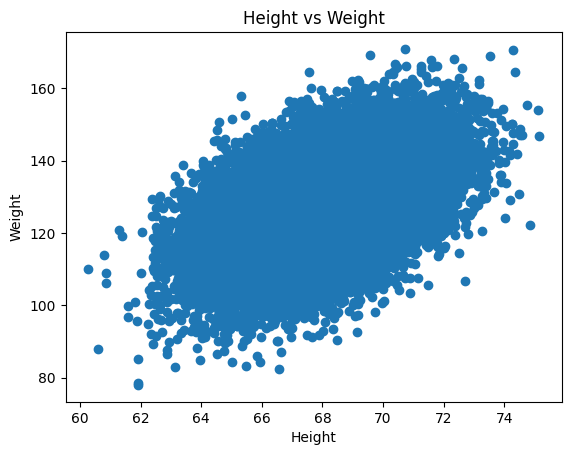

In [22]:
plt.scatter(data["Height(Inches)"], data["Weight(Pounds)"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

In [23]:
data.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


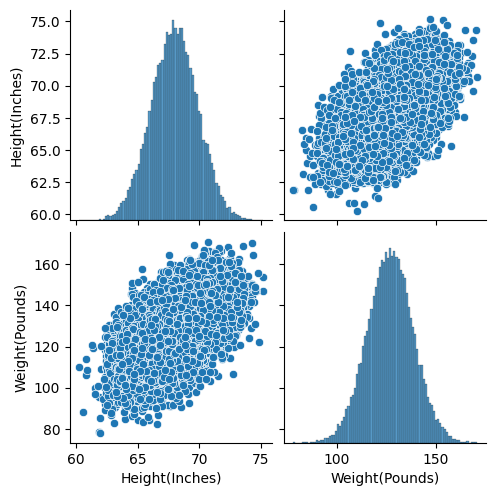

In [24]:
sns.pairplot(data)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[["Height(Inches)"]], data["Weight(Pounds)"], test_size=0.3)


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_y = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
res = model.predict(x_test)
print("Intercept Theta 0 : ", model.intercept_)
print("Coefficient Theta 1 : ", model.coef_)

Intercept Theta 0 :  [2.40756744e-17]
Coefficient Theta 1 :  [[0.50249319]]


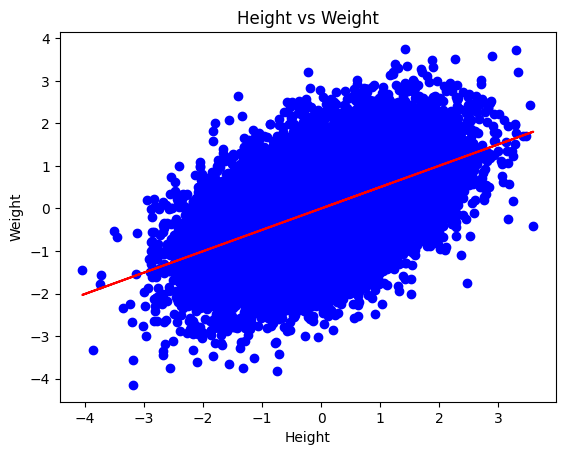

In [48]:
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, model.predict(x_train), color="red")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

In [52]:
res = model.predict(x_test)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 Score : ", r2_score(y_test, res))
print("Mean Squared Error : ", mean_squared_error(y_test, res))
print("Mean Absolute Error : ", mean_absolute_error(y_test, res))


R2 Score :  0.2537278311105331
Mean Squared Error :  0.7325296239766736
Mean Absolute Error :  0.681688445172305


In [54]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     5911.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:21:50   Log-Likelihood:                -22285.
No. Observations:               17500   AIC:                         4.457e+04
Df Residuals:                   17498   BIC:                         4.459e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.494e-17      0.007   3.82e-15      1.0